In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22afec26668>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22afec34080>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [18]:
# Perform a query to retrieve the data and precipitation scores
#Data only goes up to 2017-08-23, so we will go back two years

#calculate the date two  years ago from target date (which is today):

target_date = dt.date(2016, 10, 14)
one_year_before_target = target_date - dt.timedelta(days=365)
print(one_year_before_target)

2015-10-15


In [31]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_measurements = session.query(Measurement.date, func.avg(Measurement.prcp)) \
                        .filter(Measurement.date > one_year_before_target, Measurement.date <=target_date) \
                        .group_by(Measurement.date).all()

In [41]:
measurements_df = pd.DataFrame(last_year_measurements, columns=["Date", "Average Daily Rainfall"])

In [48]:
# Sort the dataframe by date
measurements_df = measurements_df.sort_values(by=['Date'])
measurements_df.head()

,Date,Average Daily Rainfall
0,2015-10-16,0.312500
1,2015-10-17,0.512000
2,2015-10-18,0.047500
3,2015-10-19,0.036000
4,2015-10-20,0.161667


In [65]:
#create x-tick locations and labels
new_months= []
new_months_index = []
counter = 0
for Date in measurements_df['Date']:
    if Date[-2:] == '01':
        new_months.append(Date)
        new_months_index.append(counter)
    counter = counter + 1
    

In [66]:
new_months

['2015-11-01',
 '2015-12-01',
 '2016-01-01',
 '2016-02-01',
 '2016-03-01',
 '2016-04-01',
 '2016-05-01',
 '2016-06-01',
 '2016-07-01',
 '2016-08-01',
 '2016-09-01',
 '2016-10-01']

In [67]:
new_months_index

[16, 46, 77, 108, 137, 168, 198, 229, 259, 290, 321, 351]

Text(0.5,1,'Average Daily Rainfall 2015-10-15 to 2016-10-14')

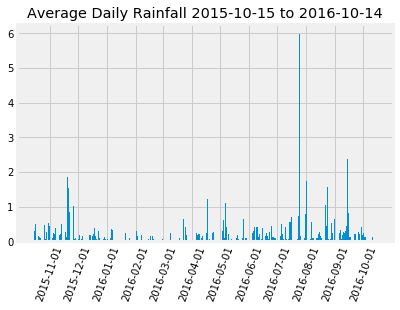

In [85]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates

plt.bar(np.arange(365), measurements_df['Average Daily Rainfall'])
plt.xticks(new_months_index, new_months, rotation = 70)
plt.title(f"Average Daily Rainfall {one_year_before_target.strftime('%Y-%m-%d')} to {target_date.strftime('%Y-%m-%d')}")

In [87]:
# Use Pandas to calcualte the statistics for the annual precipitation data
measurements_df.describe()

,Average Daily Rainfall
count,365.000000
mean,0.203244
std,0.419850
min,0.000000
25%,0.018333
50%,0.086000
75%,0.235000
max,5.970000


In [105]:
# How many stations are available in this dataset?
station_results = session.query(Measurement.station, func.count(Measurement.station)) \
                    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f' Number of stations : {len(station_results)}')

 Number of stations : 9


In [99]:
# What are the most active stations?
# List the stations and the counts in descending order.
for station in station_results:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [111]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = station_results[0][0]
lowest_temp_recorded = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp_recorded = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
average_temp_recorded = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

In [116]:
print(f'Station {most_active_station}')
print(f"Lowest temperature recorded: {lowest_temp_recorded}")
print(f'Highest temperature recorded: {highest_temp_recorded}')
print(f'Average temperature: {average_temp_recorded:.1f}')

Station USC00519281
Lowest temperature recorded: 54.0
Highest temperature recorded: 85.0
Average temperature: 71.7


In [127]:
# Choose the station with the highest number of temperature observations.
last_date_at_station = session.query(func.max(Measurement.date)).filter(Measurement.station==most_active_station).scalar()
last_datetime_at_station= dt.datetime.strptime(last_day_at_station, "%Y-%m-%d")
first_datetime_at_station = last_datetime_at_station - dt.timedelta(days = 365)

In [128]:
first_date_at_station= first_datetime_at_station.strftime("%Y-%m-%d")


In [134]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_tobs = session.query(Measurement.date, Measurement.tobs). \
                    filter(Measurement.station==most_active_station, \
                           Measurement.date > first_date_at_station, \
                           Measurement.date <= last_date_at_station). \
                    order_by(Measurement.date.asc()).all()

Text(0,0.5,'Frequency in Last 12 Months')

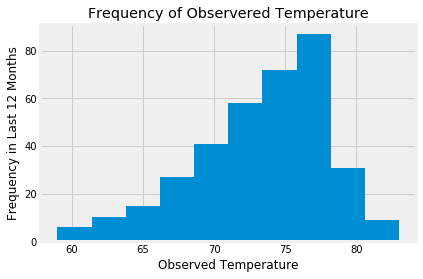

In [141]:
last_12_months_tobs_df = pd.DataFrame(last_12_months_tobs, columns = ["Date", "Temperature"])
plt.hist(last_12_months_tobs_df['Temperature'], bins = 10)
plt.title("Frequency of Observered Temperature")
plt.xlabel("Observed Temperature")
plt.ylabel("Frequency in Last 12 Months")

#### Optional

In [184]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [185]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [186]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [187]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [188]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [189]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [190]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [191]:
# Plot the daily normals as an area plot with `stacked=False`


In [143]:
app = Flask(__name__)

@app.route("/api/v1.0/precipitation")
def temperature():
    #Query for the dates and precipitation from 3 years to 2 years ago.
    
    today = dt.date.today()
    search_end_date = today - dt.timedelta(days = 365)
    search_start_date = search_end_date -dt.timedelta(days = 365)
    
    #convert datetime objects to strings
    search_start_date = search_start_date.strftime("%Y-%m-%d")
    search_end_date = search_end_date.strftime("%Y-%m-%d")
    
    query_results = session.query(Measurement.date, Measurement.prcp). \
                    filter(Measurement.date>search_start_date,
                      Measurement.date <= search_end_date).all()
    
    #Convert the query results to a Dictionary using date as the key and prcp as the value.
    prcp_measurements = []
    for result in query_results:
        date_precipitation = {}
        date_precipitation[result.date] = result.prcp
        prcp_measurements.append(date_precipitation)

    #Return the JSON representation of your dictionary.
    return jsonify(prcp_measurements)

if __name__ == '__main__':
    app.run(debug=True)

UnsupportedOperation: not writable